# Pumpkin Dataset Analysis

## Steps

###### Step 1: Data set description
###### Step 2: Data Visualization
###### Step 3: Train-Test-Validation Split
###### Step 4: Modeling without Scaling
###### Step 5: Modeling with Scaling(Pipeline)
###### Step 6: Hyperparameter Tuning with GridSearchCV
###### Step 7: Model Comparison
###### Step 8: Observations
###### Step 9: Conclusion


## 1. Dataset Description

This dataset contains physical measurements of different types of pumpkin seeds.  
The features describe the shape and size of the seeds, including Area, Perimeter, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, Extent, Solidity, Roundness, Aspect Ratio, and Compactness.

**Prediction Target (Label):**  
- Class (The type of pumpkin seed)

**Goal:**  
The goal is to build machine learning models to classify the type of pumpkin seed based on these measurements.


### 1.1 Importing required libraries


In [2]:
#import neccessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

### 1. 2 Load Dataset & Overview

In [3]:
seed = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx', engine='openpyxl')

# Encoding the class column using get_dummies, use drop_first to merge the column to one instead of having two
seed = pd.get_dummies(seed,drop_first = True)

#Rename the column name
seed.rename(columns = {'Class_Ürgüp Sivrisi': 'Class'}, inplace = True)

# See the heads
seed.head()


Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  Class  
0       0.8207  False  
1       0.7487  False  
2       0.6929  False  
3       0.7624  False  
4       0.7557  False

In [4]:
# Check out the column names
seed.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [5]:
#check the data information to know if there is any null value
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   bool   
dtypes: bool(1), float64(10), int64(2)
memory usage: 236.9 KB


In [6]:
# Unique values in the class column
seed['Class'].unique()

array([False,  True])

In [7]:
# Target Variable
X = seed.drop('Class', axis=1)
y = seed['Class']

## 2. Visualaization of data


### 2.1 Area vs Perimeter by class

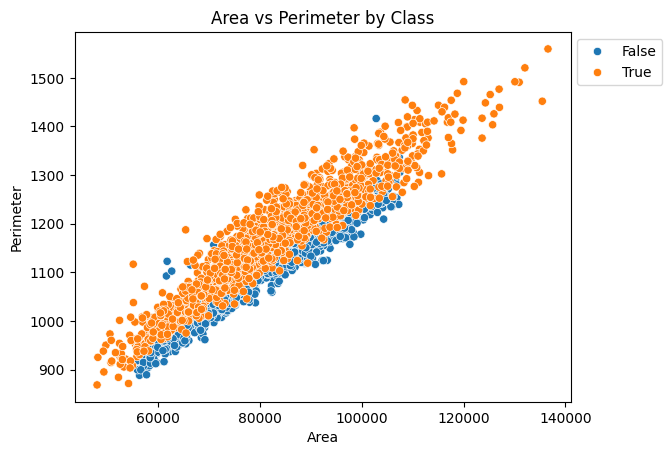

In [8]:
#Visualizing the dataset (basic scatter plot to explore relationships between features)

sns.scatterplot(x='Area', y='Perimeter', hue='Class', data=seed)
plt.title('Area vs Perimeter by Class')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


### 2.2 pairwise scatterplots between all the numerical columns

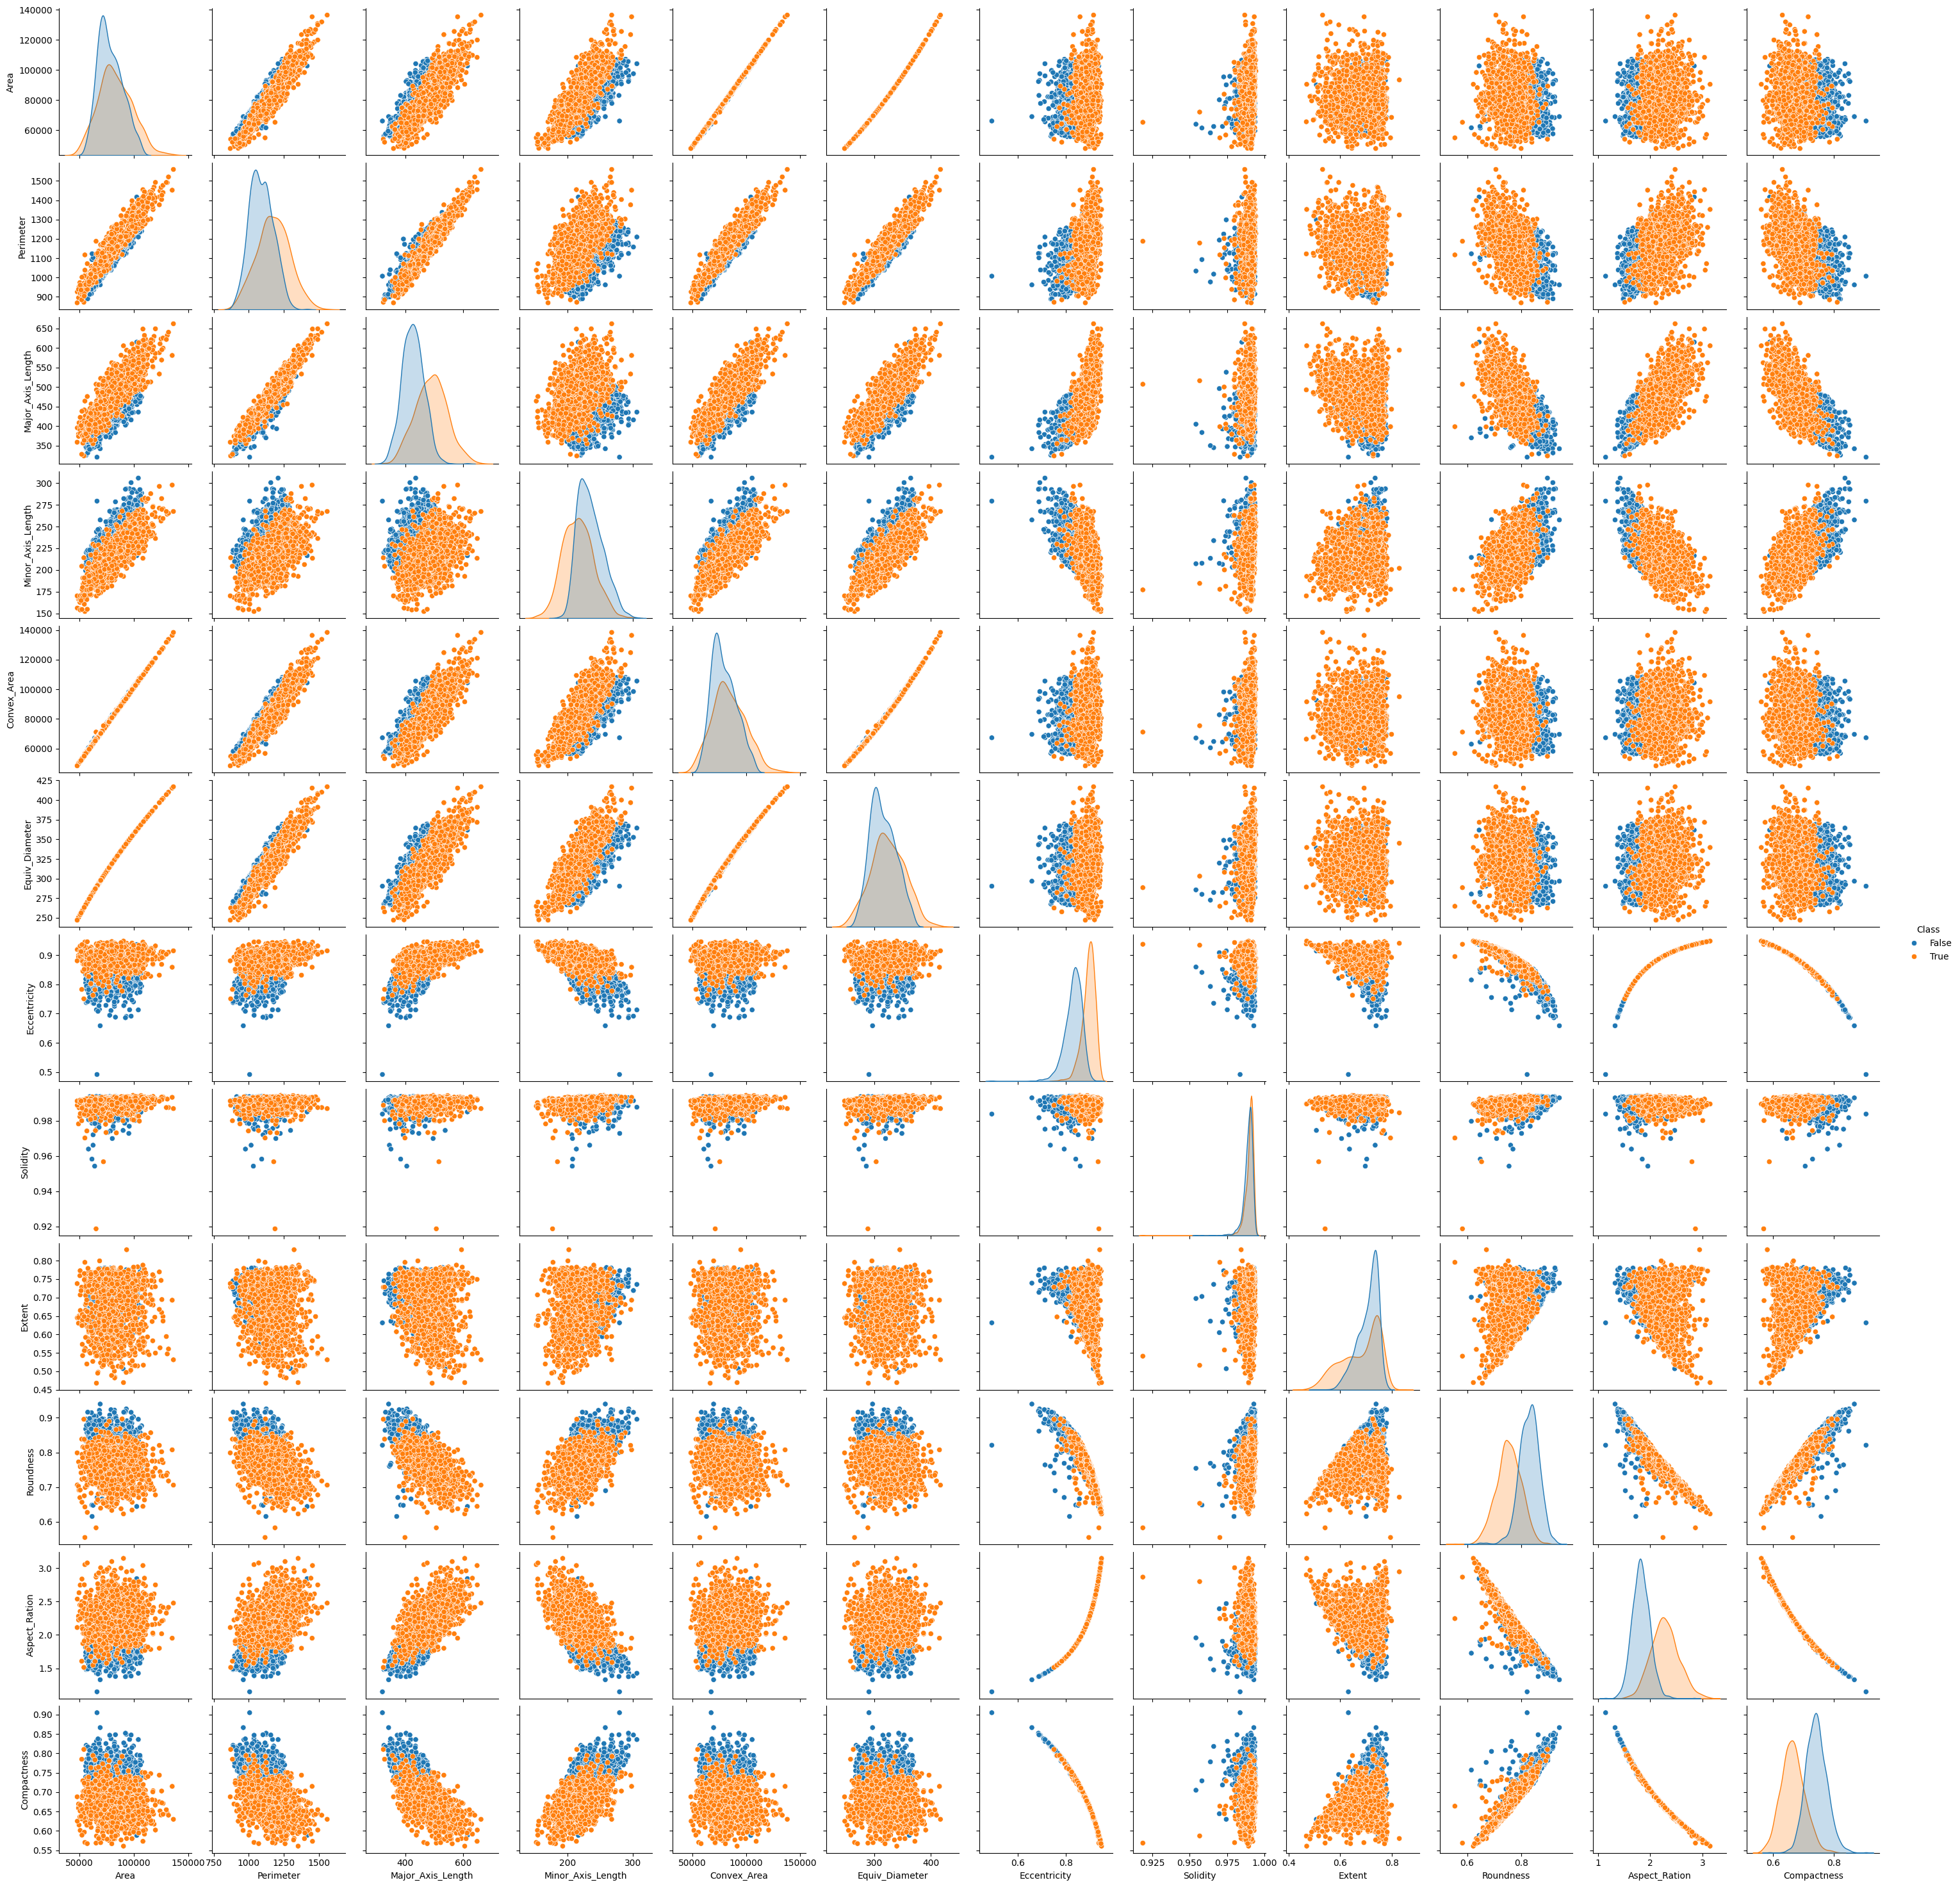

In [9]:
# pairwise scatterplots between all the numerical columns, while coloring the points based on the Class
sns.pairplot(seed, hue='Class')
plt.show()

### 2.3 Scatter plot of Major Axis Length vs Perimeter by Seed Class

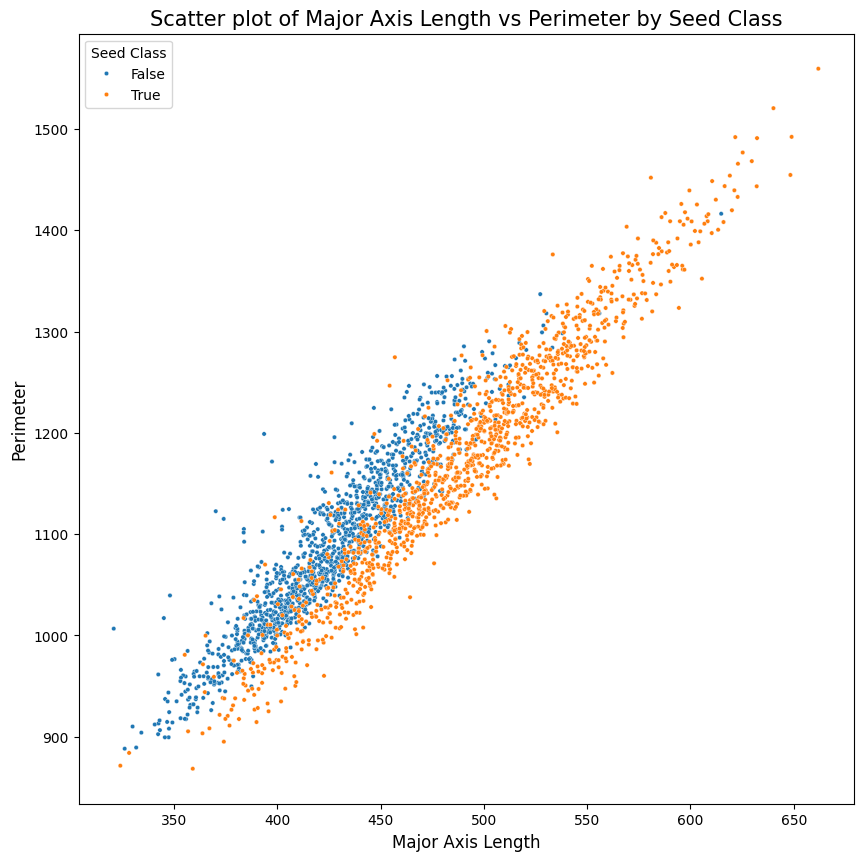

In [10]:
# visualizes the relationship between Major_Axis_Length and Perimeter.
# It shows how the different classes are spread.

plt.figure(figsize=(10,10))
sns.scatterplot(data=seed, x='Major_Axis_Length', y='Perimeter', hue='Class', s=10)
plt.title('Scatter plot of Major Axis Length vs Perimeter by Seed Class', fontsize=15)
plt.xlabel('Major Axis Length', fontsize=12)
plt.ylabel('Perimeter', fontsize=12)
plt.legend(title='Seed Class')
plt.show()

### 3. Train - Test - Validation Split

In [11]:
# Encoding lables
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Spliting the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)  

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1500, 12)
Validation set size: (500, 12)
Test set size: (500, 12)


### 4. Modeling without Scaling

In [12]:
# Linear SVM without scaling
model_linear_no_scaling = SVC(kernel='linear', C=1)
model_linear_no_scaling.fit(X_train, y_train)
y_val_pred = model_linear_no_scaling.predict(X_val)
print("Linear SVM without scaling:")
print(classification_report(y_val, y_val_pred))

# RBF SVM without scaling
model_rbf_no_scaling = SVC(kernel='rbf', C=1)
model_rbf_no_scaling.fit(X_train, y_train)
y_val_pred = model_rbf_no_scaling.predict(X_val)
print("RBF SVM without scaling:")
print(classification_report(y_val, y_val_pred))

Linear SVM without scaling:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       260
           1       0.86      0.83      0.85       240

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

RBF SVM without scaling:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68       260
           1       0.65      0.27      0.38       240

    accuracy                           0.58       500
   macro avg       0.61      0.57      0.53       500
weighted avg       0.61      0.58      0.54       500



### 5. Modeling with Scaling (Pipeline)


In [13]:
# Linear SVM with scaling
pipe_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C=1))
])

pipe_linear.fit(X_train, y_train)
y_val_pred = pipe_linear.predict(X_val)
print("Linear SVM with scaling:")
print(classification_report(y_val, y_val_pred))

# Polynomial SVM with scaling
pipe_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, C=1))
])

pipe_poly.fit(X_train, y_train)
y_val_pred = pipe_poly.predict(X_val)
print("Polynomial SVM with scaling:")
print(classification_report(y_val, y_val_pred))

# RBF SVM with scaling
pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1))
])

pipe_rbf.fit(X_train, y_train)
y_val_pred = pipe_rbf.predict(X_val)
print("RBF SVM with scaling:")
print(classification_report(y_val, y_val_pred))

Linear SVM with scaling:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       260
           1       0.87      0.82      0.85       240

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

Polynomial SVM with scaling:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       260
           1       0.92      0.74      0.82       240

    accuracy                           0.84       500
   macro avg       0.86      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500

RBF SVM with scaling:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       260
           1       0.87      0.84      0.86       240

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       50

### 6. Hyperparameter Tuning (GridSearchCV)




Hyperparameter Tuning:
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters: {'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       260
           1       0.89      0.84      0.86       240

    accuracy                           0.87       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.87      0.87       500



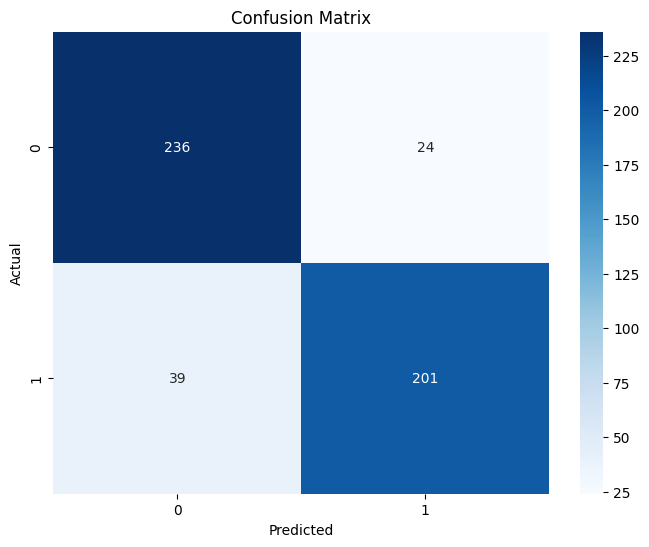

In [14]:
print("\n\nHyperparameter Tuning:")

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__degree': [2, 3, 4]  # only relevant for 'poly'
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

# Final evaluation with the best model
best_model = grid.best_estimator_
y_test_pred = best_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### 7. Model Comparison (Validation Set)


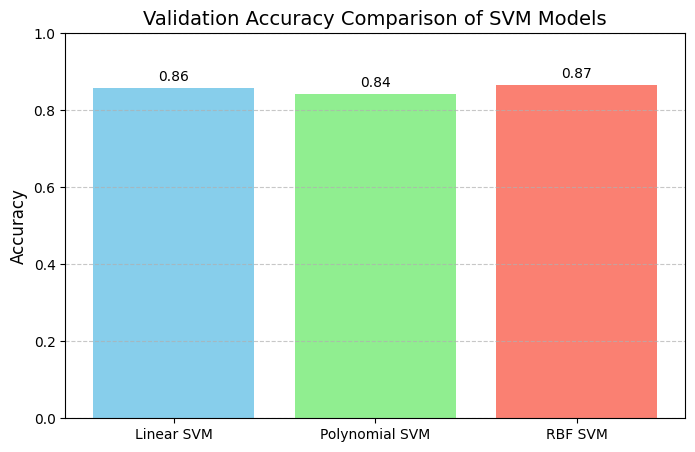

In [15]:
from sklearn.metrics import accuracy_score

acc_linear = accuracy_score(y_val, pipe_linear.predict(X_val))
acc_poly = accuracy_score(y_val, pipe_poly.predict(X_val))
acc_rbf = accuracy_score(y_val, pipe_rbf.predict(X_val))

# Models and their accuracies
models = ['Linear SVM', 'Polynomial SVM', 'RBF SVM']
accuracies = [acc_linear, acc_poly, acc_rbf]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Validation Accuracy Comparison of SVM Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

### 8. Observations

- Without scaling, the SVM models performed poorly and showed lower accuracy. 
- So Scaling significantly improved the performance of SVM models.
- After applying StandardScaler, the models significantly improved their performance.
- Among the three kernels tested (linear, polynomial, RBF):
  - **RBF kernel** performed the best overall.
  - Polynomial kernel sometimes overfitted the training data.
  - Linear SVM was the fastest but had slightly lower accuracy.
- Using pipelines kept the code clean and reproducible.
- Hyperparameter tuning (especially C and degree) further enhanced the model.

- The best model was the RBF SVM with C=10 and gamma='scale' (chosen via GridSearchCV).


### 9. Conclusion

-   Scaling and careful hyperparameter tuning greatly enhanced the classification results.
-   The final model was retrained using the combined training + validation data and evaluated on the test set.
-   The best model is an RBF SVM with tuned C and gamma, trained using scaled features.
-   Proper scaling and hyperparameter optimization are crucial for best performance with SVMs.